In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract
# Load the dataset
df = pd.read_csv('Amazon Sales data.csv')
df


Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Priority  Order Date   Order ID   Ship Date  \
0        Offline              H   5/28/2010  669165933   6/27/2010   
1         Online              C   8/22/2012  963881480   9/15/2012   
2        Offline              L    5/2/2014  341417157    5/8/2014   
3         Online              C   6/20/2014  514321792    7/5/2014   
4        Offline              L    2/1/2013  115456712    2/6/2013   
..           ...            ...         ...        ...         ...   
95        Online              M   7/26/2011  512878119    9/3/2011   
96       Offline              L  11/11/2011  810711038  12/28/2011   
97       Offline              C    6/1/2016  728815257   6/29/2016   
98       Offline              M   7/30/2015  559427106    8/8/2015   
99       Offline              L   2/10/2012  665095412   2/15/2012   

    Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  
0         9925      255.28     159.42     2533654.00  1582243.50     951410.50  
1         2804      205.70     117.11      576782.80   328376.44     248406.36  
2         1779      651.21     524.96     1158502.59   933903.84     224598.75  
3         8102        9.33       6.92       75591.66    56065.84      19525.82  
4         5062      651.21     524.96     3296425.02  2657347.52     639077.50  
..         ...         ...        ...            ...         ...           ...  
95         888      109.28      35.84       97040.64    31825.92      65214.72  
96        6267        9.33       6.92       58471.11    43367.64      15103.47  
97        1485      154.06      90.93      228779.10   135031.05      93748.05  
98        5767       81.73      56.67      471336.91   326815.89     144521.02  
99        5367      668.27     502.54     3586605.09  2697132.18     889472.91  

[100 rows x 14 columns]

In [202]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year-Month'] = df['Order Date'].dt.to_period('M')


In [203]:
month_wise_sales = df.groupby('Month')['Total Revenue'].sum()
print("Month-wise Sales Trend:\n", month_wise_sales)

# Year-wise Sales Trend
year_wise_sales = df.groupby('Year')['Total Revenue'].sum()
print("Year-wise Sales Trend:\n", year_wise_sales)

# Yearly Month-wise Sales Trend
year_month_wise_sales = df.groupby('Year-Month')['Total Revenue'].sum()
print("Yearly Month-wise Sales Trend:\n", year_month_wise_sales)


Month-wise Sales Trend:
 Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64
Year-wise Sales Trend:
 Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64
Yearly Month-wise Sales Trend:
 Year-Month
2010-02    3410661.12
2010-05    2587973.26
2010-06    1082418.40
2010-10    6064933.75
2010-11    3458252.00
2010-12    2581786.39
2011-01    1042225.35
2011-02     387002.20
2011-04    2798046.49
2011-05     272410.45
2011-06      19103.44
2011-07      97040.64
2011-09     574951.92
2011-11    5938385.58
2012-01    1012884.00
2012-02    6707849.42
2012-03     994765.42
2012-04    4556012.38
2012-05    3782781.82
2012-06    2132075.27
2012-07  

In [204]:
item_type_sales = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
print("Total Sales by Item Type:\n", item_type_sales)

# Units Sold by Region
region_units_sold = df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)
print("Units Sold by Region:\n", region_units_sold)

Total Sales by Item Type:
 Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64
Units Sold by Region:
 Region
Sub-Saharan Africa                   182870
Europe                                98117
Australia and Oceania                 68325
Asia                                  59967
Middle East and North Africa          48678
Central America and the Caribbean     35771
North America                         19143
Name: Units Sold, dtype: int64


In [205]:
average_order_value = df['Total Revenue'].mean()
print(f'Average Order Value: {average_order_value}')

# Shipping Duration Analysis
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
shipping_duration_stats = df['Shipping Duration'].describe()
print("Shipping Duration Statistics:\n", shipping_duration_stats)

Average Order Value: 1373487.6831
Shipping Duration Statistics:
 count    100.000000
mean      23.360000
std       14.742586
min        0.000000
25%        9.750000
50%       23.500000
75%       36.250000
max       50.000000
Name: Shipping Duration, dtype: float64


In [206]:
# Relationships Between Attributes
# Correlation Matrix
correlation_matrix = df[['Units Sold', 'Unit Price', 'Total Revenue', 'Total Cost', 'Total Profit', 'Shipping Duration']].corr()
print("Correlation Matrix:\n", correlation_matrix)



Correlation Matrix:
                    Units Sold  Unit Price  Total Revenue  Total Cost  \
Units Sold           1.000000   -0.070486       0.447784    0.374746   
Unit Price          -0.070486    1.000000       0.752360    0.787905   
Total Revenue        0.447784    0.752360       1.000000    0.983928   
Total Cost           0.374746    0.787905       0.983928    1.000000   
Total Profit         0.564550    0.557365       0.897327    0.804091   
Shipping Duration   -0.050720   -0.063159      -0.022288   -0.033098   

                   Total Profit  Shipping Duration  
Units Sold             0.564550          -0.050720  
Unit Price             0.557365          -0.063159  
Total Revenue          0.897327          -0.022288  
Total Cost             0.804091          -0.033098  
Total Profit           1.000000           0.007608  
Shipping Duration      0.007608           1.000000  


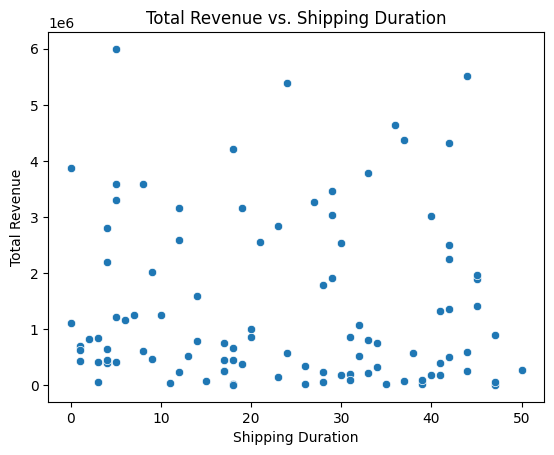

In [207]:
# Sales vs. Shipping Duration
sns.scatterplot(data=df, x='Shipping Duration', y='Total Revenue')
plt.title('Total Revenue vs. Shipping Duration')
plt.show()

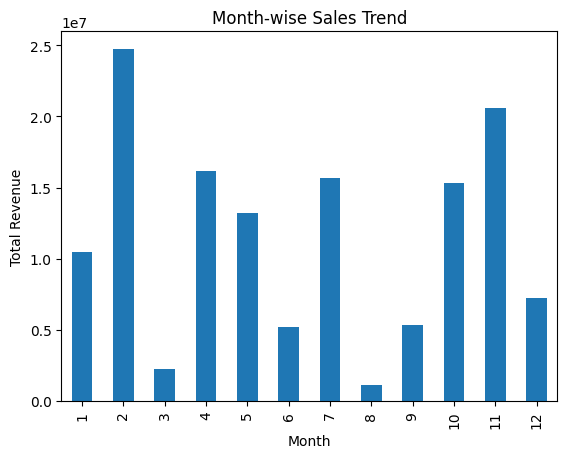

In [208]:
# Step 5: Visualize
# Month-wise Sales Trend
month_wise_sales.plot(kind='bar', title='Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

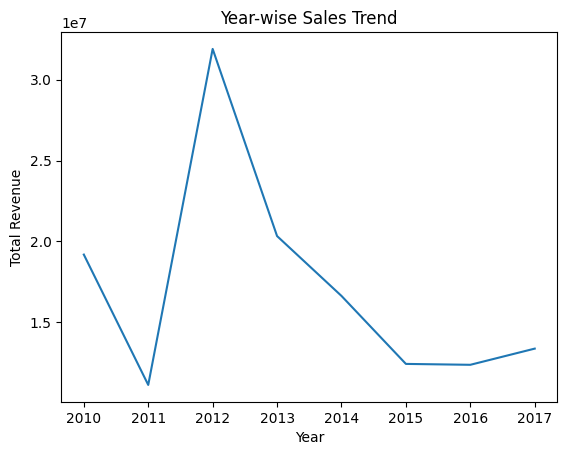

In [209]:
year_wise_sales.plot(kind='line', title='Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

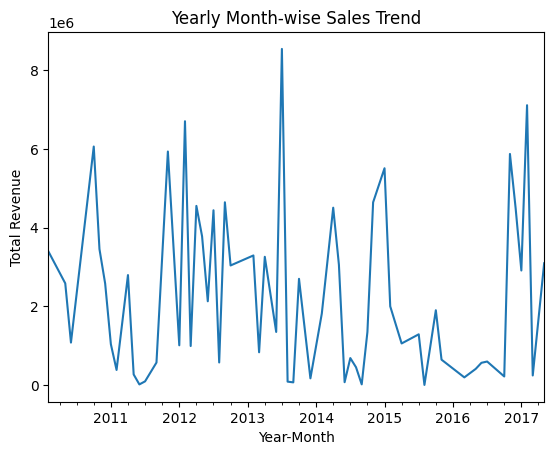

In [210]:
year_month_wise_sales.plot(kind='line', title='Yearly Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.show()


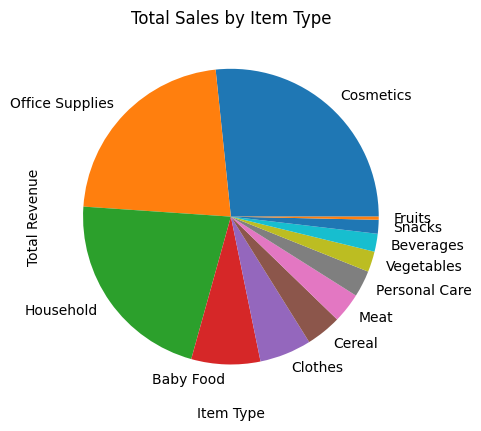

In [211]:
item_type_sales.plot(kind='pie', title='Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.show()

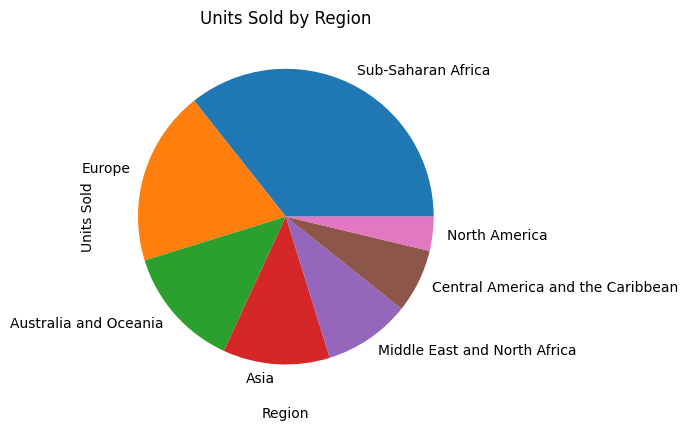

In [212]:
# Units Sold by Region
region_units_sold.plot(kind='pie', title='Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.show()


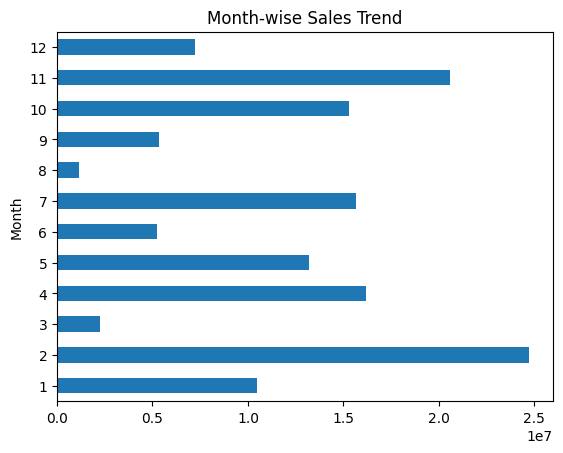

In [213]:
month_wise_sales.plot(kind='barh', title='Month-wise Sales Trend').get_figure().savefig('month_wise_sales.png')



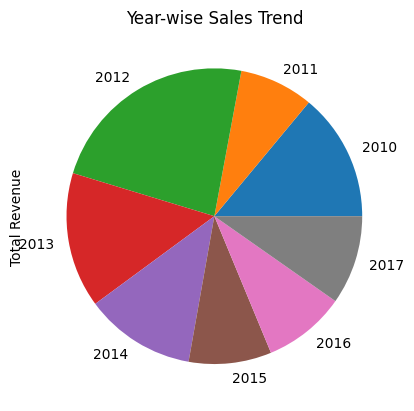

In [214]:
year_wise_sales.plot(kind='pie', title='Year-wise Sales Trend').get_figure().savefig('year_wise_sales.png')


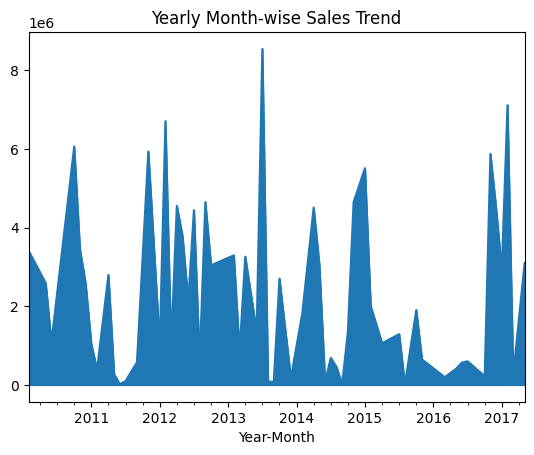

In [215]:
year_month_wise_sales.plot(kind='area', title='Yearly Month-wise Sales Trend').get_figure().savefig('year_month_wise_sales.png')




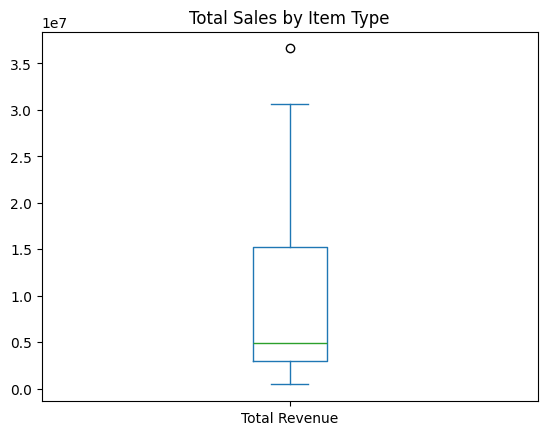

In [216]:
item_type_sales.plot(kind='box', title='Total Sales by Item Type').get_figure().savefig('item_type_sales.png')


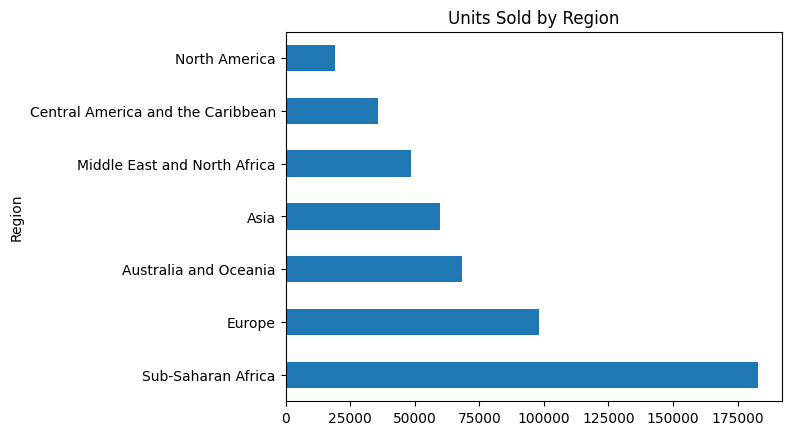

In [217]:
region_units_sold.plot(kind='barh', title='Units Sold by Region').get_figure().savefig('region_units_sold.png')


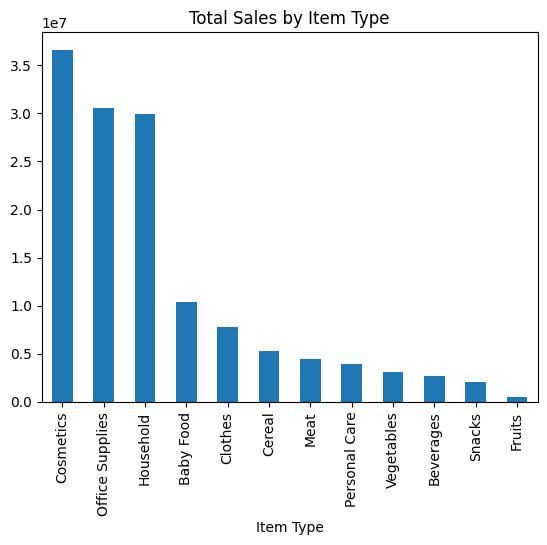

In [218]:

item_type_sales.plot(kind='bar', title='Total Sales by Item Type').get_figure().savefig('item_type_sales.png')


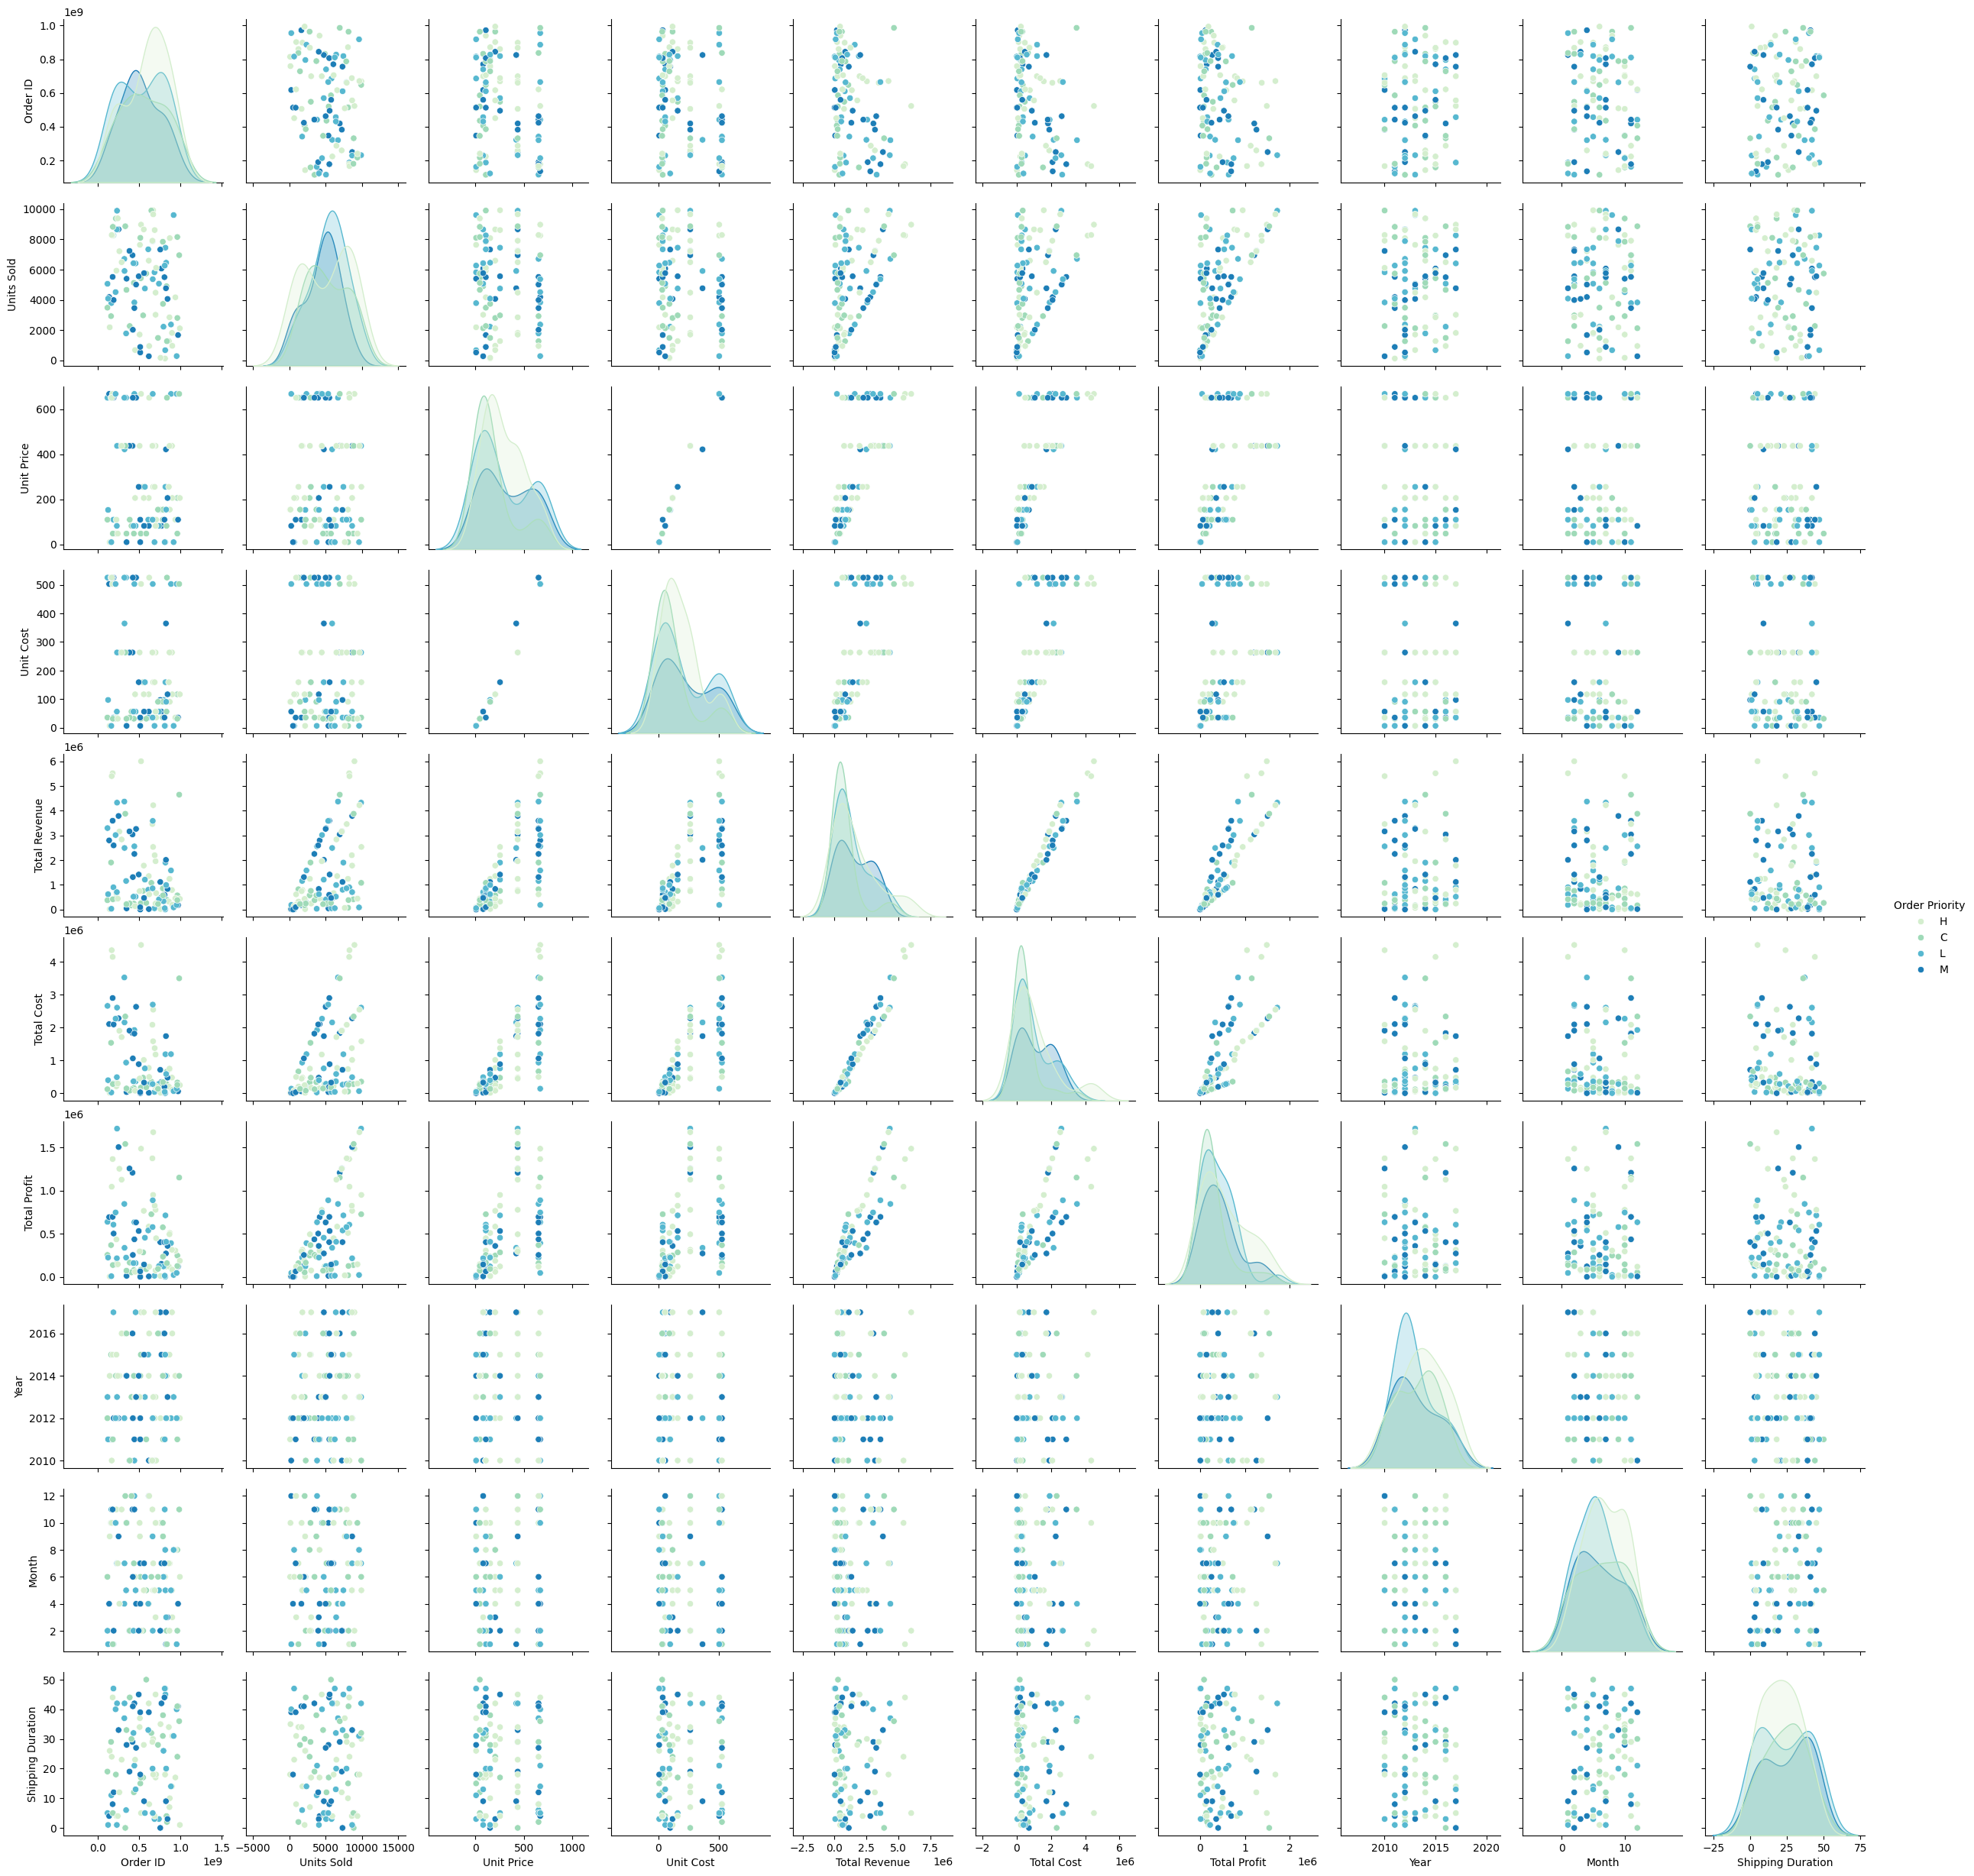

In [219]:
sns.pairplot(df,hue="Order Priority",palette="GnBu")
plt.show()

In [220]:
#FIFA
import pandas as pd

# Load the datasets
world_cups_df = pd.read_csv('WorldCups.csv') 
world_cups_df

# Display the first few rows of each dataset to understand their structure


Year       Country      Winner      Runners-Up        Third  \
0   1930       Uruguay     Uruguay       Argentina          USA   
1   1934         Italy       Italy  Czechoslovakia      Germany   
2   1938        France       Italy         Hungary       Brazil   
3   1950        Brazil     Uruguay          Brazil       Sweden   
4   1954   Switzerland  Germany FR         Hungary      Austria   
5   1958        Sweden      Brazil          Sweden       France   
6   1962         Chile      Brazil  Czechoslovakia        Chile   
7   1966       England     England      Germany FR     Portugal   
8   1970        Mexico      Brazil           Italy   Germany FR   
9   1974       Germany  Germany FR     Netherlands       Poland   
10  1978     Argentina   Argentina     Netherlands       Brazil   
11  1982         Spain       Italy      Germany FR       Poland   
12  1986        Mexico   Argentina      Germany FR       France   
13  1990         Italy  Germany FR       Argentina        Italy   
14  1994           USA      Brazil           Italy       Sweden   
15  1998        France      France          Brazil      Croatia   
16  2002   Korea/Japan      Brazil         Germany       Turkey   
17  2006       Germany       Italy          France      Germany   
18  2010  South Africa       Spain     Netherlands      Germany   
19  2014        Brazil     Germany       Argentina  Netherlands   

            Fourth  GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0       Yugoslavia           70              13             18    590.549  
1          Austria           70              16             17        363  
2           Sweden           84              15             18      375.7  
3            Spain           88              13             22  1.045.246  
4          Uruguay          140              16             26    768.607  
5       Germany FR          126              16             35     819.81  
6       Yugoslavia           89              16             32    893.172  
7     Soviet Union           89              16             32  1.563.135  
8          Uruguay           95              16             32  1.603.975  
9           Brazil           97              16             38  1.865.753  
10           Italy          102              16             38  1.545.791  
11          France          146              24             52  2.109.723  
12         Belgium          132              24             52  2.394.031  
13         England          115              24             52  2.516.215  
14        Bulgaria          141              24             52  3.587.538  
15     Netherlands          171              32             64  2.785.100  
16  Korea Republic          161              32             64  2.705.197  
17        Portugal          147              32             64  3.359.439  
18         Uruguay          145              32             64  3.178.856  
19          Brazil          171              32             64  3.386.810

In [221]:
world_cup_matches_df = pd.read_csv('WorldCupMatches.csv') 
world_cup_matches_df 

Year              Datetime                     Stage  \
0    1930  13 Jul 1930 - 15:00                    Group 1   
1    1930  13 Jul 1930 - 15:00                    Group 4   
2    1930  14 Jul 1930 - 12:45                    Group 2   
3    1930  14 Jul 1930 - 14:50                    Group 3   
4    1930  15 Jul 1930 - 16:00                    Group 1   
..    ...                   ...                       ...   
847  2014  05 Jul 2014 - 17:00             Quarter-finals   
848  2014  08 Jul 2014 - 17:00                Semi-finals   
849  2014  09 Jul 2014 - 17:00                Semi-finals   
850  2014  12 Jul 2014 - 17:00   Play-off for third place   
851  2014  13 Jul 2014 - 16:00                      Final   

                 Stadium             City Home Team Name  Home Team Goals  \
0                Pocitos      Montevideo          France                4   
1         Parque Central      Montevideo             USA                3   
2         Parque Central      Montevideo      Yugoslavia                2   
3                Pocitos      Montevideo         Romania                3   
4         Parque Central      Montevideo       Argentina                1   
..                   ...              ...            ...              ...   
847     Arena Fonte Nova        Salvador     Netherlands                0   
848     Estadio Mineirao  Belo Horizonte          Brazil                1   
849   Arena de Sao Paulo       Sao Paulo     Netherlands                0   
850     Estadio Nacional        Brasilia          Brazil                0   
851  Estadio do Maracana  Rio De Janeiro         Germany                1   

     Away Team Goals Away Team Name                         Win conditions  \
0                  1         Mexico                                          
1                  0        Belgium                                          
2                  1         Brazil                                          
3                  1           Peru                                          
4                  0         France                                          
..               ...            ...                                    ...   
847                0     Costa Rica  Netherlands win on penalties (4 - 3)    
848                7        Germany                                          
849                0      Argentina    Argentina win on penalties (2 - 4)    
850                3    Netherlands                                          
851                0      Argentina          Germany win after extra time    

     Attendance  Half-time Home Goals  Half-time Away Goals  \
0        4444.0                     3                     0   
1       18346.0                     2                     0   
2       24059.0                     2                     0   
3        2549.0                     1                     0   
4       23409.0                     0                     0   
..          ...                   ...                   ...   
847     51179.0                     0                     0   
848     58141.0                     0                     5   
849     63267.0                     0                     0   
850     68034.0                     0                     2   
851     74738.0                     0                     0   

                    Referee                  Assistant 1  \
0    LOMBARDI Domingo (URU)        CRISTOPHE Henry (BEL)   
1         MACIAS Jose (ARG)     MATEUCCI Francisco (URU)   
2       TEJADA Anibal (URU)      VALLARINO Ricardo (URU)   
3     WARNKEN Alberto (CHI)          LANGENUS Jean (BEL)   
4       REGO Gilberto (BRA)         SAUCEDO Ulises (BOL)   
..                      ...                          ...   
847   Ravshan IRMATOV (UZB)  RASULOV Abduxamidullo (UZB)   
848   RODRIGUEZ Marco (MEX)      TORRENTERA Marvin (MEX)   
849      C�neyt �AKIR (TUR)         DURAN Bahattin (TUR)   
850   HAIMOUDI Djamel (ALG)         ACHIK Redouane (M

In [222]:

world_cup_players_df = pd.read_csv('WorldCupPlayers.csv')
world_cup_players_df

RoundID    MatchID Team Initials               Coach Name Line-up  \
0          201       1096           FRA      CAUDRON Raoul (FRA)       S   
1          201       1096           MEX         LUQUE Juan (MEX)       S   
2          201       1096           FRA      CAUDRON Raoul (FRA)       S   
3          201       1096           MEX         LUQUE Juan (MEX)       S   
4          201       1096           FRA      CAUDRON Raoul (FRA)       S   
...        ...        ...           ...                      ...     ...   
37779   255959  300186501           ARG  SABELLA Alejandro (ARG)       N   
37780   255959  300186501           GER       LOEW Joachim (GER)       N   
37781   255959  300186501           ARG  SABELLA Alejandro (ARG)       N   
37782   255959  300186501           GER       LOEW Joachim (GER)       N   
37783   255959  300186501           ARG  SABELLA Alejandro (ARG)       N   

       Shirt Number       Player Name Position       Event  
0                 0       Alex THEPOT       GK         NaN  
1                 0   Oscar BONFIGLIO       GK         NaN  
2                 0  Marcel LANGILLER      NaN        G40'  
3                 0      Juan CARRENO      NaN        G70'  
4                 0   Ernest LIBERATI      NaN         NaN  
...             ...               ...      ...         ...  
37779            19           ALVAREZ      NaN         NaN  
37780             6           KHEDIRA      NaN         NaN  
37781            20            AGUERO      NaN  IH46' Y65'  
37782            21           MUSTAFI      NaN         NaN  
37783            23           BASANTA      NaN         NaN  

[37784 rows x 9 columns]

In [223]:
# Cleaning the data: Checking for missing values and data types

# WorldCups Dataset
world_cups_df.info()
print("\nMissing values in WorldCups dataset:\n", world_cups_df.isnull().sum())

# WorldCupMatches Dataset
world_cup_matches_df.info()
print("\nMissing values in WorldCupMatches dataset:\n", world_cup_matches_df.isnull().sum())

# WorldCupPlayers Dataset
world_cup_players_df.info()
print("\nMissing values in WorldCupPlayers dataset:\n", world_cup_players_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB

Missing values in WorldCups dataset:
 Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Check for missing values
print(world_cups_df.isnull().sum())

# For simplicity, let's fill any missing numeric values with 0 and categorical values with 'Unknown'
world_cups_df.fillna({'Winner': 'Unknown', 'Runners-Up': 'Unknown', 'Third': 'Unknown', 'Fourth': 'Unknown'}, inplace=True)
world_cups_df.fillna(0, inplace=True)


Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64


In [225]:
print(world_cup_players_df.isnull().sum())

# For simplicity, let's fill any missing numeric values with 0 and categorical values with 'Unknown'
world_cup_players_df.fillna({'Winner': 'Unknown', 'Runners-Up': 'Unknown', 'Third': 'Unknown', 'Fourth': 'Unknown'}, inplace=True)
world_cup_players_df.fillna(0, inplace=True)


RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64


In [226]:
print(world_cup_matches_df .isnull().sum())

# For simplicity, let's fill any missing numeric values with 0 and categorical values with 'Unknown'
world_cup_matches_df .fillna({'Winner': 'Unknown', 'Runners-Up': 'Unknown', 'Third': 'Unknown', 'Fourth': 'Unknown'}, inplace=True)
world_cup_matches_df .fillna(0, inplace=True)


Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64


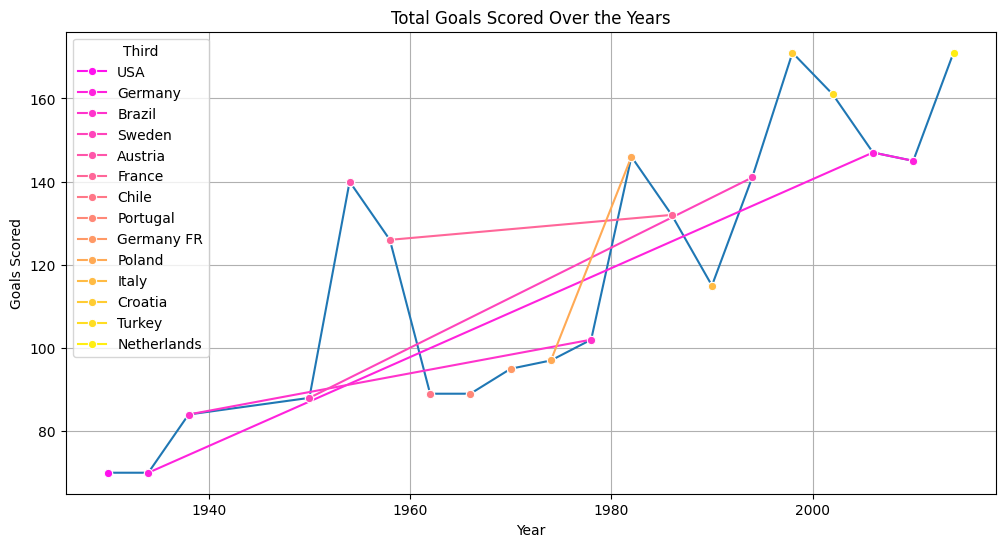

In [227]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_cups_df, x='Year', y='GoalsScored', marker='o')
sns.lineplot(data=world_cups_df, x='Year', y='GoalsScored', hue='Third',marker='o',palette='spring')

plt.title('Total Goals Scored Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()
# world_cups_df
# world_cup_matches_df
# world_cup_players_df

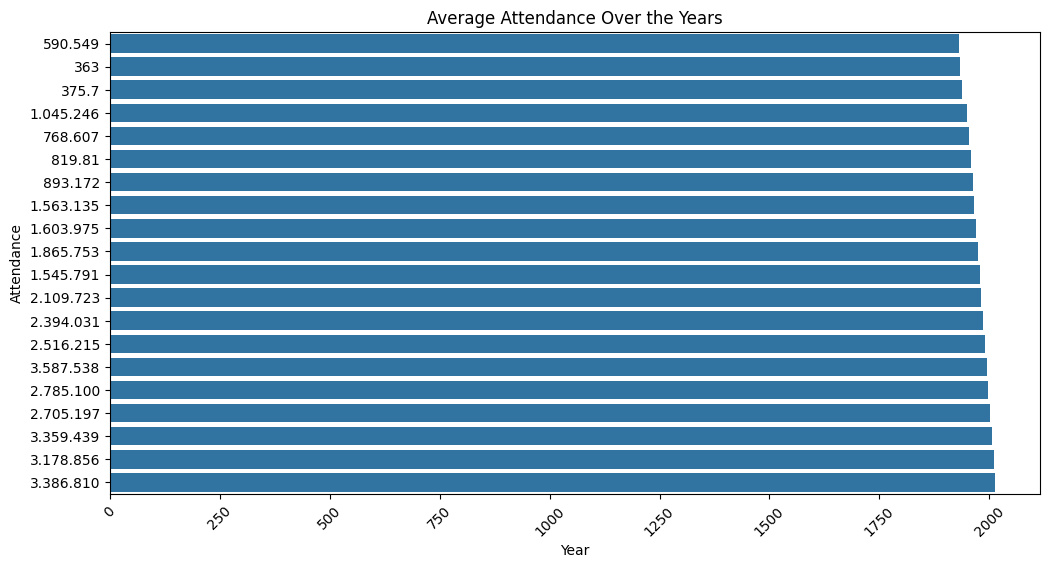

In [228]:
plt.figure(figsize=(12, 6))
sns.barplot(data=world_cups_df, x='Year', y='Attendance')
plt.title('Average Attendance Over the Years')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()
# world_cups_df
# world_cup_matches_df
# world_cup_players_df


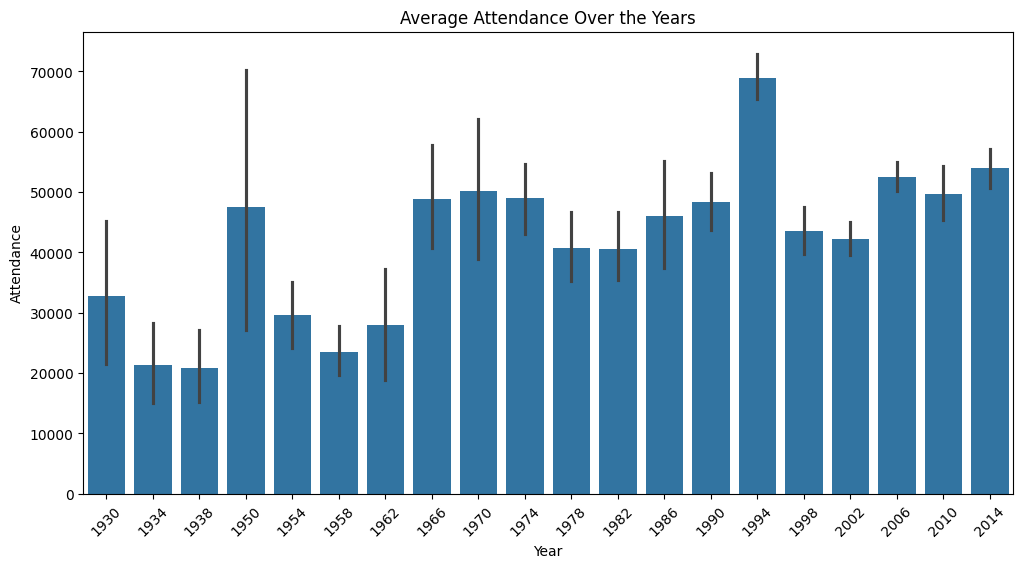

In [229]:
plt.figure(figsize=(12, 6))
sns.barplot(data= world_cup_matches_df, x='Year', y='Attendance')
plt.title('Average Attendance Over the Years')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()
# world_cups_df
# world_cup_matches_df
# world_cup_players_df

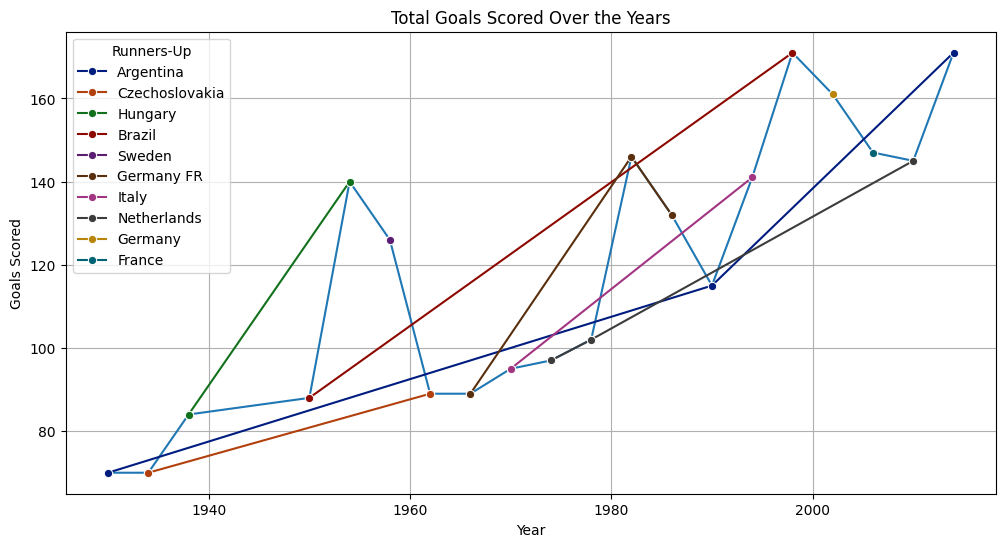

In [230]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_cups_df, x='Year', y='GoalsScored', marker='o')
sns.lineplot(data=world_cups_df, x='Year', y='GoalsScored', hue='Runners-Up',marker='o',palette='dark')

plt.title('Total Goals Scored Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()
# world_cups_df
# world_cup_matches_df
# world_cup_players_df

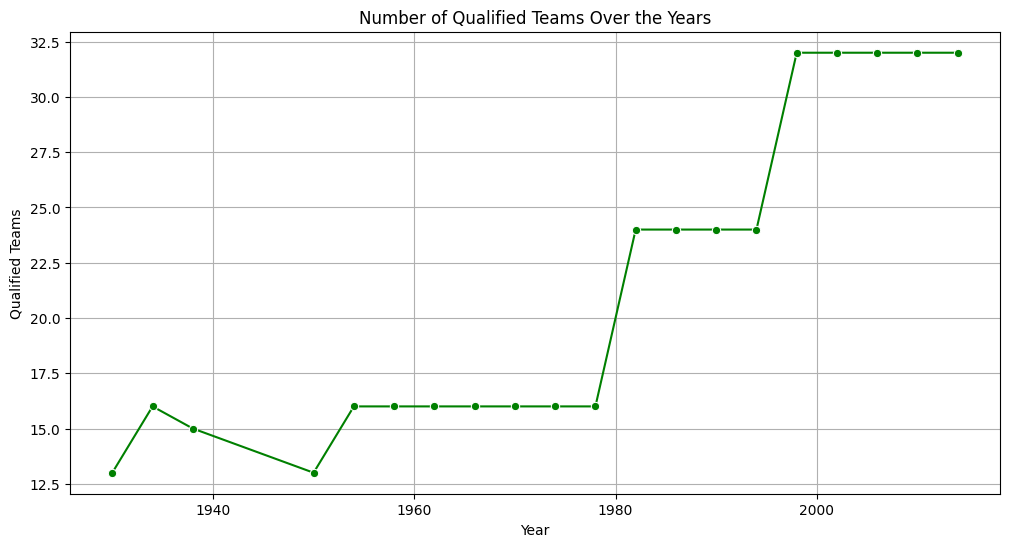

In [231]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_cups_df, x='Year', y='QualifiedTeams', marker='o', color='green')
plt.title('Number of Qualified Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Qualified Teams')
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9912\1971487008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=world_cups_df, x='Winner', palette='dark',order=world_cups_df['Winner'].value_counts().index)


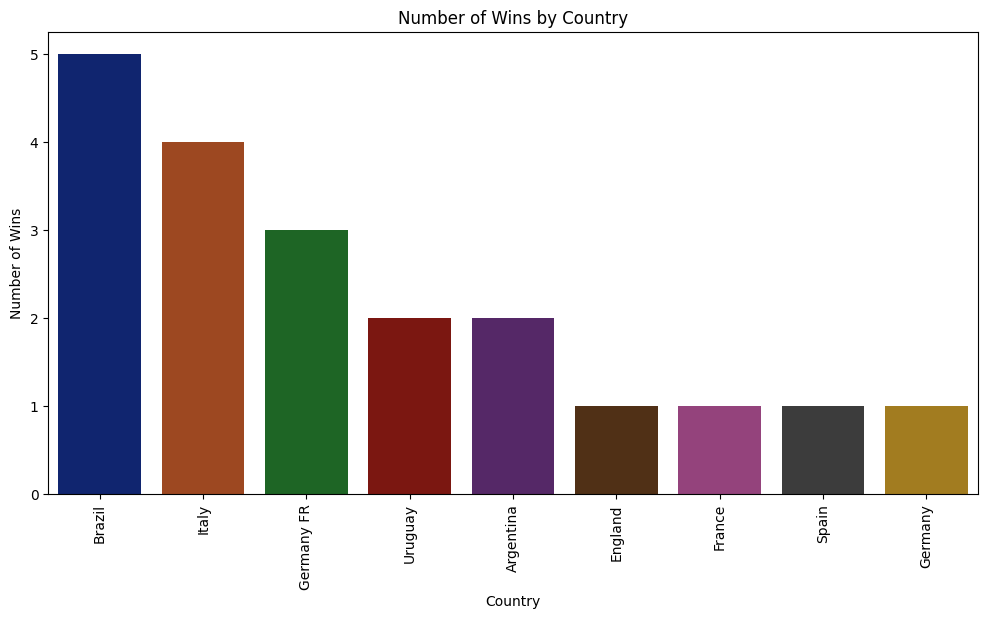

In [232]:
plt.figure(figsize=(12, 6))
sns.countplot(data=world_cups_df, x='Winner', palette='dark',order=world_cups_df['Winner'].value_counts().index)
plt.title('Number of Wins by Country')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()
# world_cups_df
# world_cup_matches_df
# world_cup_players_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_9912\3614844622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=world_cups_df, x='Runners-Up', palette='bright',order=world_cups_df['Runners-Up'].value_counts().index)


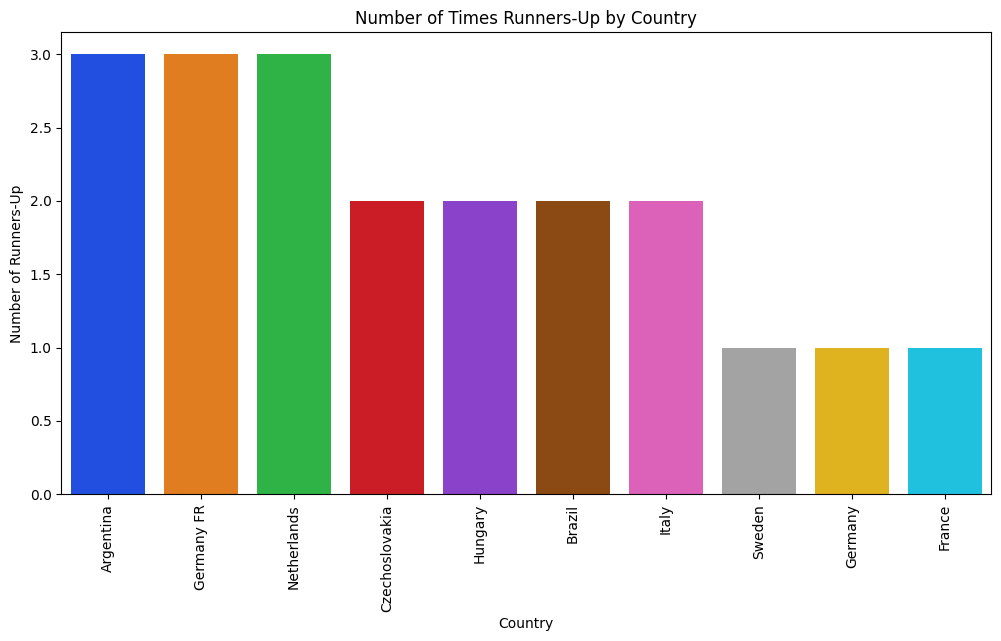

In [233]:
plt.figure(figsize=(12, 6))
sns.countplot(data=world_cups_df, x='Runners-Up', palette='bright',order=world_cups_df['Runners-Up'].value_counts().index)
plt.title('Number of Times Runners-Up by Country')
plt.xlabel('Country')
plt.ylabel('Number of Runners-Up') 
plt.xticks(rotation=90) 
plt.show()
# world_cups_df
# world_cup_matches_df
# world_cup_players_df

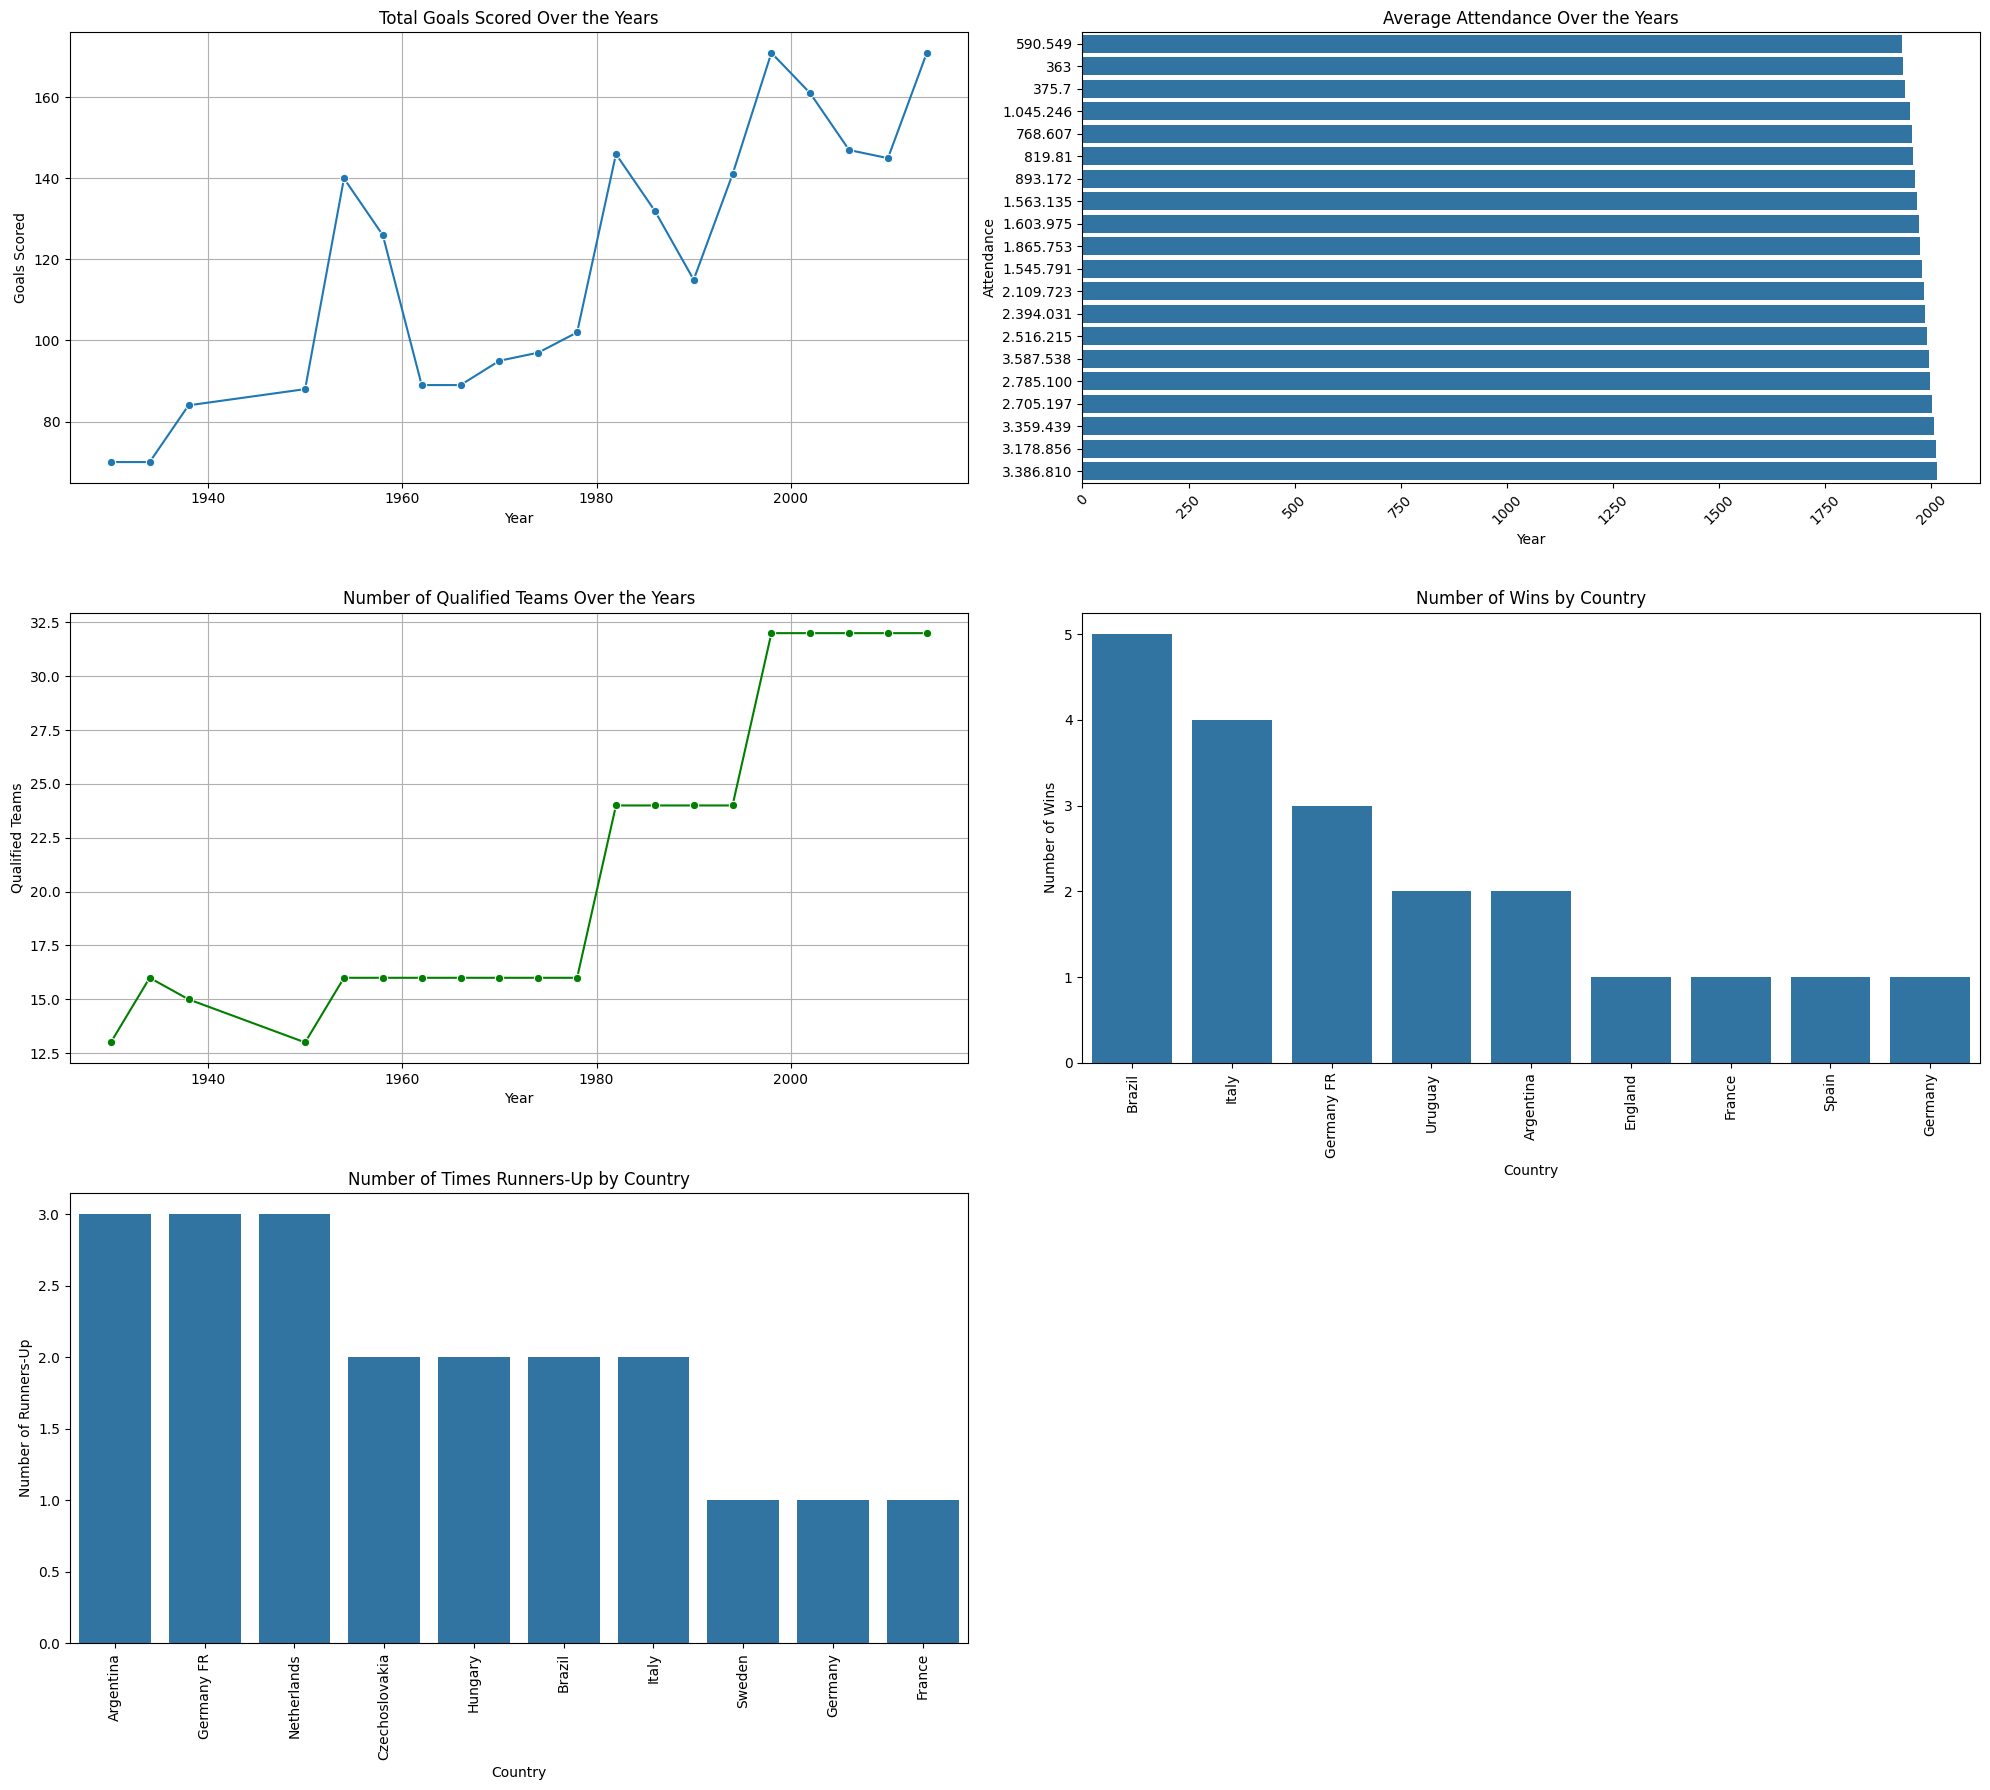

In [234]:
def create_dashboard(df):
    plt.figure(figsize=(20, 18))
    
    # Total Goals Scored Over the Years
    plt.subplot(3, 2, 1)
    sns.lineplot(data=world_cups_df, x='Year', y='GoalsScored', marker='o')
    plt.title('Total Goals Scored Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Goals Scored')
    plt.grid(True)
    
    # Average Attendance Over the Years
    plt.subplot(3, 2, 2)
    sns.barplot(data=world_cups_df, x='Year', y='Attendance')
    plt.title('Average Attendance Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Attendance')
    plt.xticks(rotation=45)
    
    # Number of Qualified Teams Over the Years
    plt.subplot(3, 2, 3)
    sns.lineplot(data=world_cups_df, x='Year', y='QualifiedTeams', marker='o', color='green')
    plt.title('Number of Qualified Teams Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Qualified Teams')
    plt.grid(True)
    
    # Winners Over the Years
    plt.subplot(3, 2, 4)
    sns.countplot(data=world_cups_df, x='Winner', order=world_cups_df['Winner'].value_counts().index)
    plt.title('Number of Wins by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=90)
    
    # Runners-Up Over the Years
    plt.subplot(3, 2, 5)
    sns.countplot(data=world_cups_df, x='Runners-Up', order=world_cups_df['Runners-Up'].value_counts().index)
    plt.title('Number of Times Runners-Up by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Runners-Up')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

# Call the function to create the dashboard
create_dashboard(world_cups_df)


In [235]:
import pandas as pd
df=pd.read_csv("Crop Production data.csv")
df


State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[246091 rows x 7 columns]

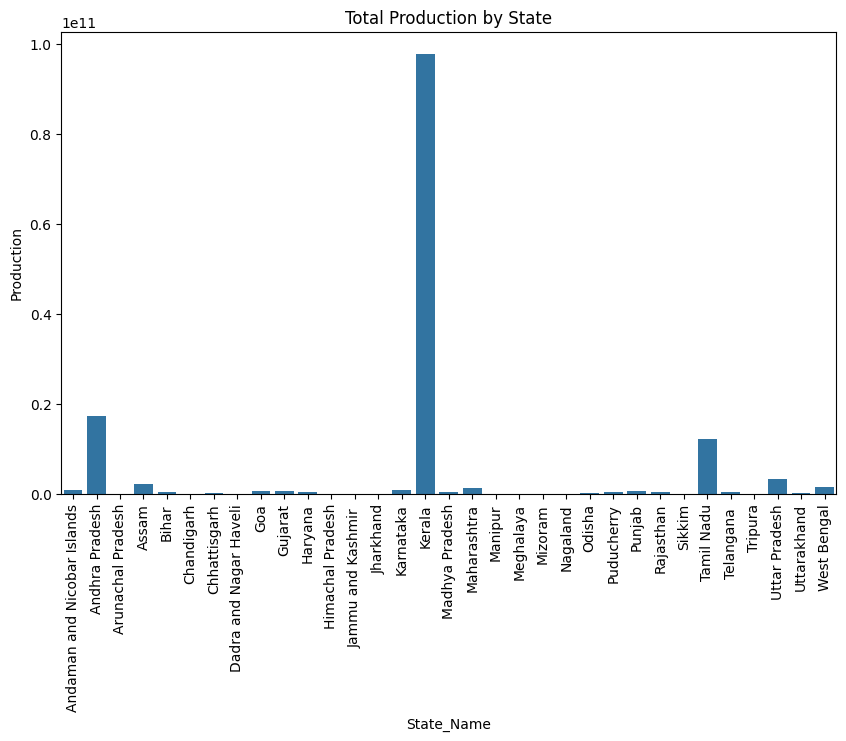

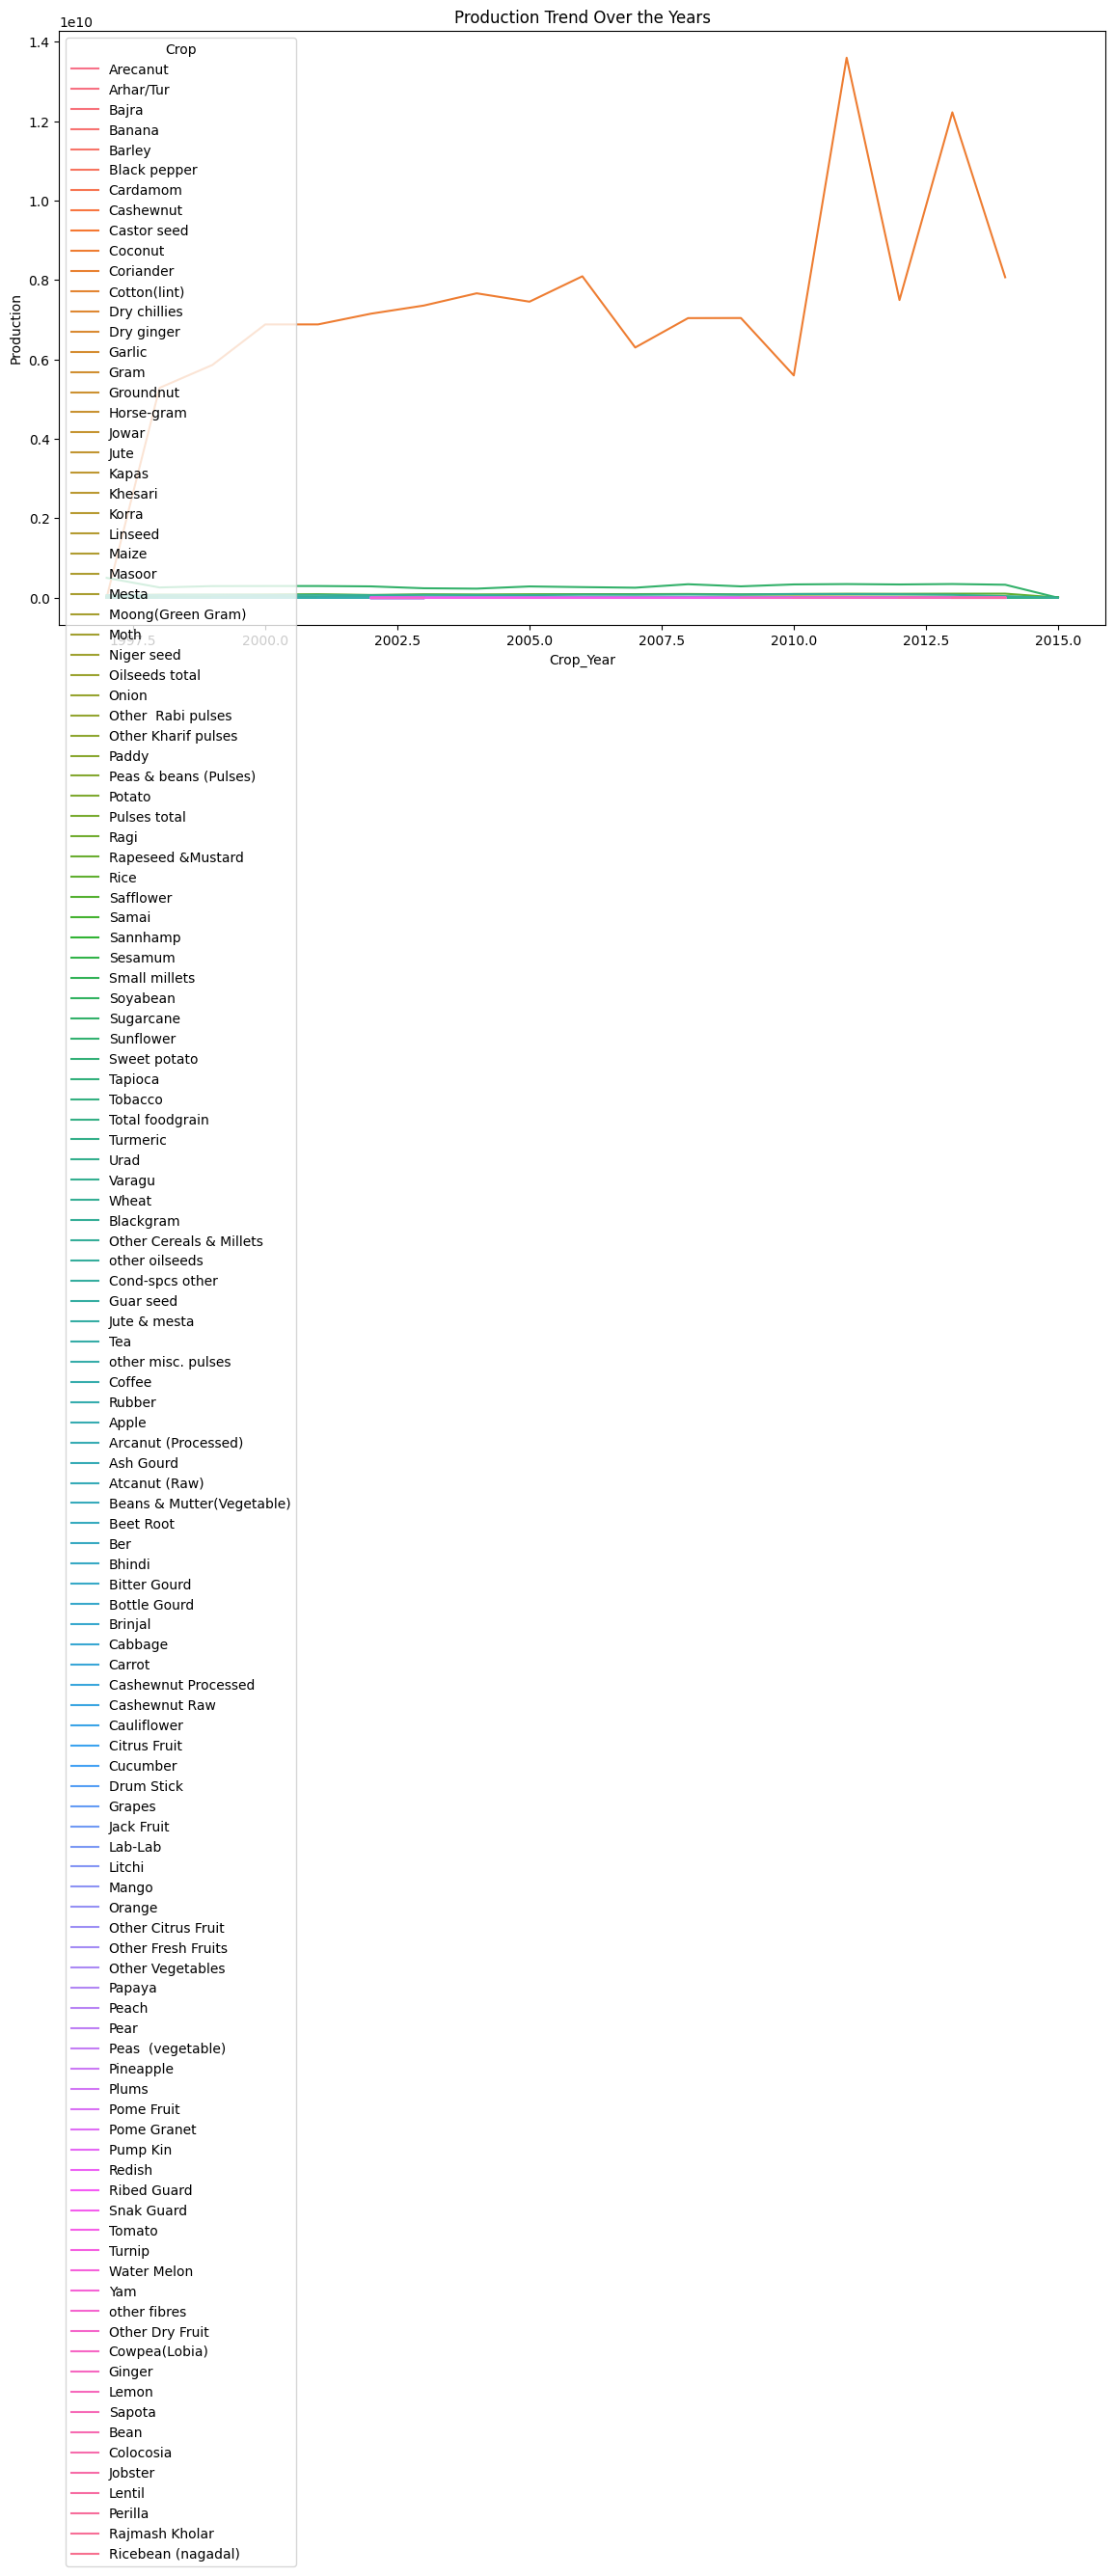

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


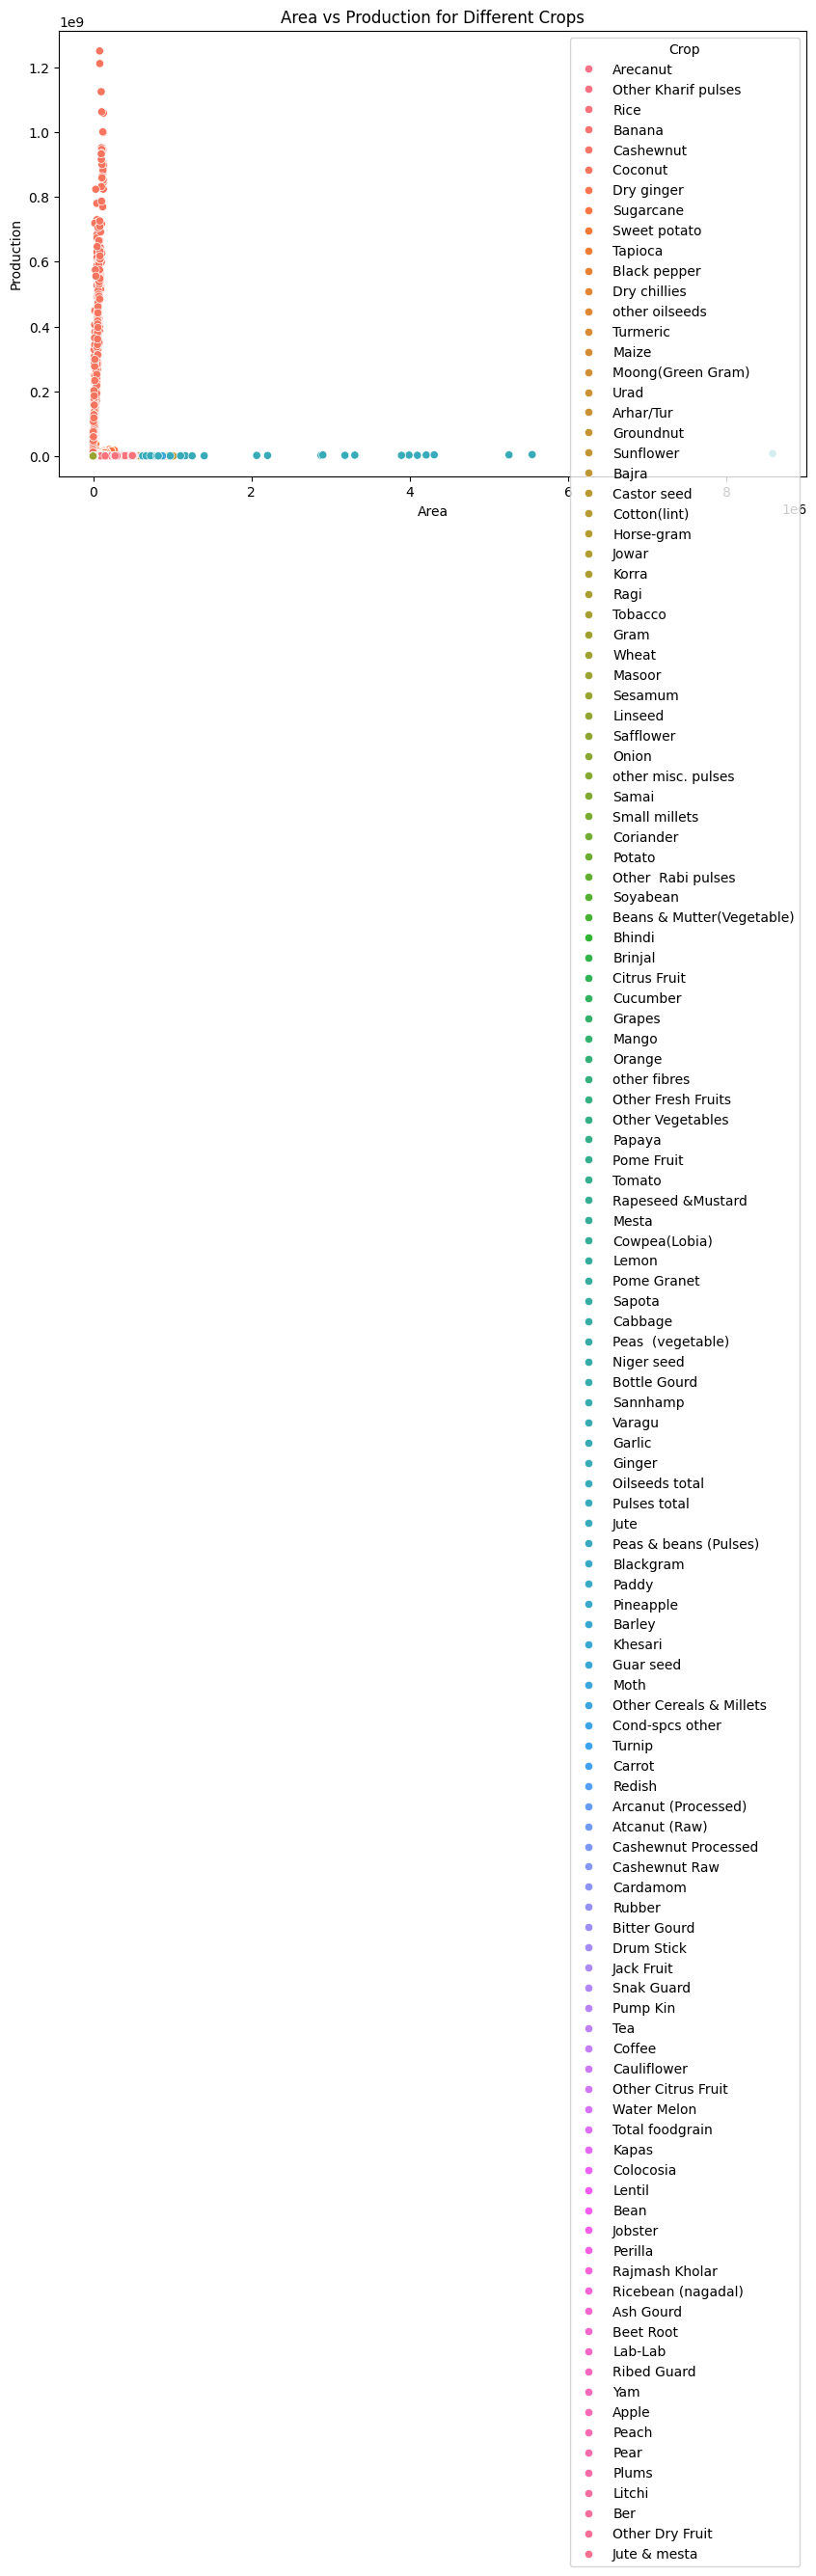

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar chart: Total production by state
plt.figure(figsize=(10, 6))
total_production_by_state = df.groupby('State_Name')['Production'].sum().reset_index()
sns.barplot(x='State_Name', y='Production', data=total_production_by_state)
plt.xticks(rotation=90)
plt.title('Total Production by State')
plt.show()

# Line chart: Production trend over the years for different crops
plt.figure(figsize=(14, 8))
production_trend = df.groupby(['Crop_Year', 'Crop'])['Production'].sum().reset_index()
sns.lineplot(x='Crop_Year', y='Production', hue='Crop', data=production_trend)
plt.title('Production Trend Over the Years')
plt.show()

# Scatter plot: Area vs Production for different crops
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', hue='Crop', data=df)
plt.title('Area vs Production for Different Crops')
plt.show()



<Axes: ylabel='Season'>

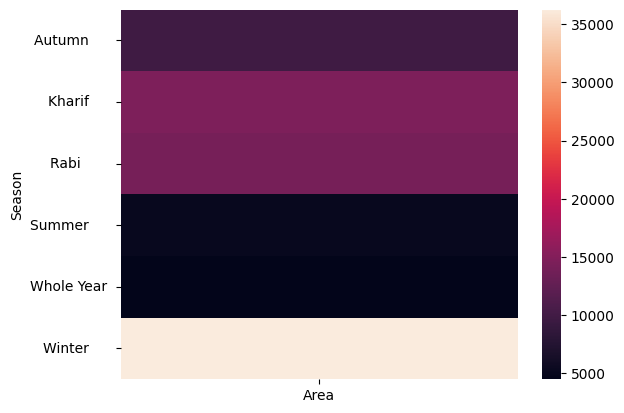

In [242]:

import pandas as pd
df=pd.read_csv("Crop Production data.csv")
df

gp=df.groupby("Season").agg({"Area":"mean"})
sns.heatmap(gp)

<Axes: ylabel='Crop_Year'>

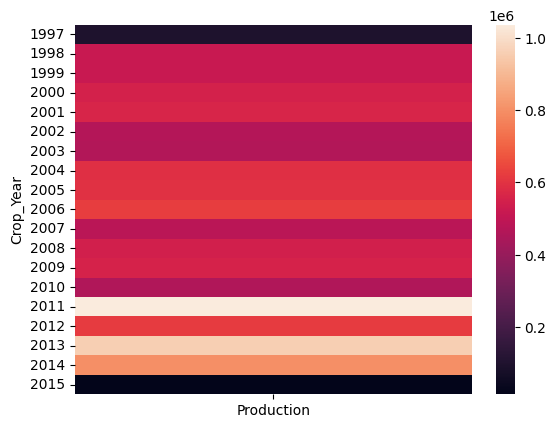

In [243]:

import pandas as pd
df=pd.read_csv("Crop Production data.csv")
df
gp=df.groupby("Crop_Year").agg({"Production":"mean"})
sns.heatmap(gp)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9912\2142414492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State_Name', y='Production',data=total_production_by_state,palette="bright")


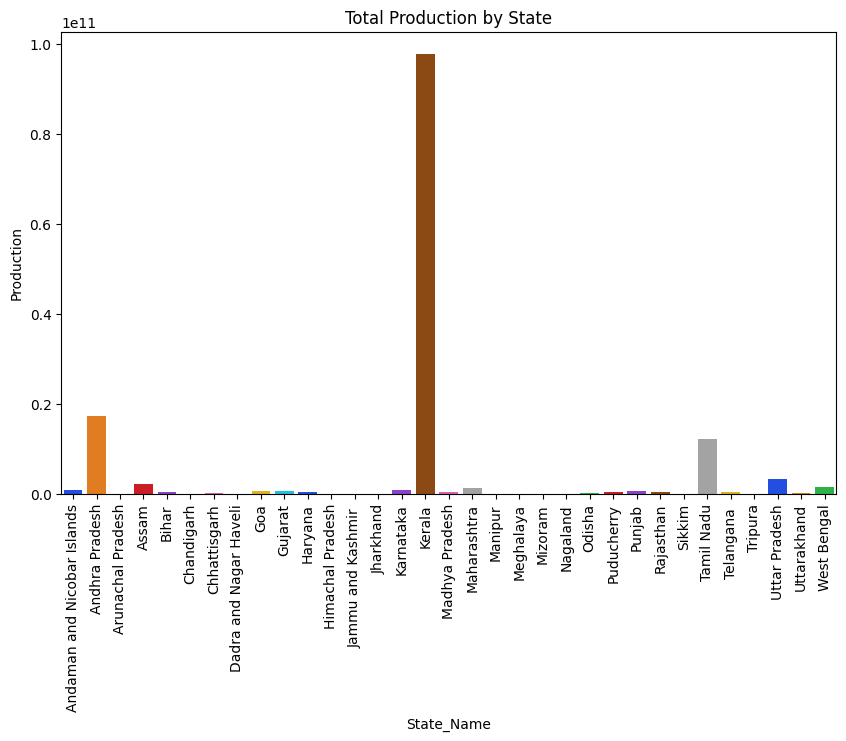

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar chart: Total production by state
plt.figure(figsize=(10, 6))
total_production_by_state = df.groupby('State_Name')['Production'].sum().reset_index()
sns.barplot(x='State_Name', y='Production',data=total_production_by_state,palette="bright")
plt.xticks(rotation=90)
plt.title('Total Production by State')
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_9912\993935979.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='District_Name', x='Production', data=top_districts, palette='viridis')


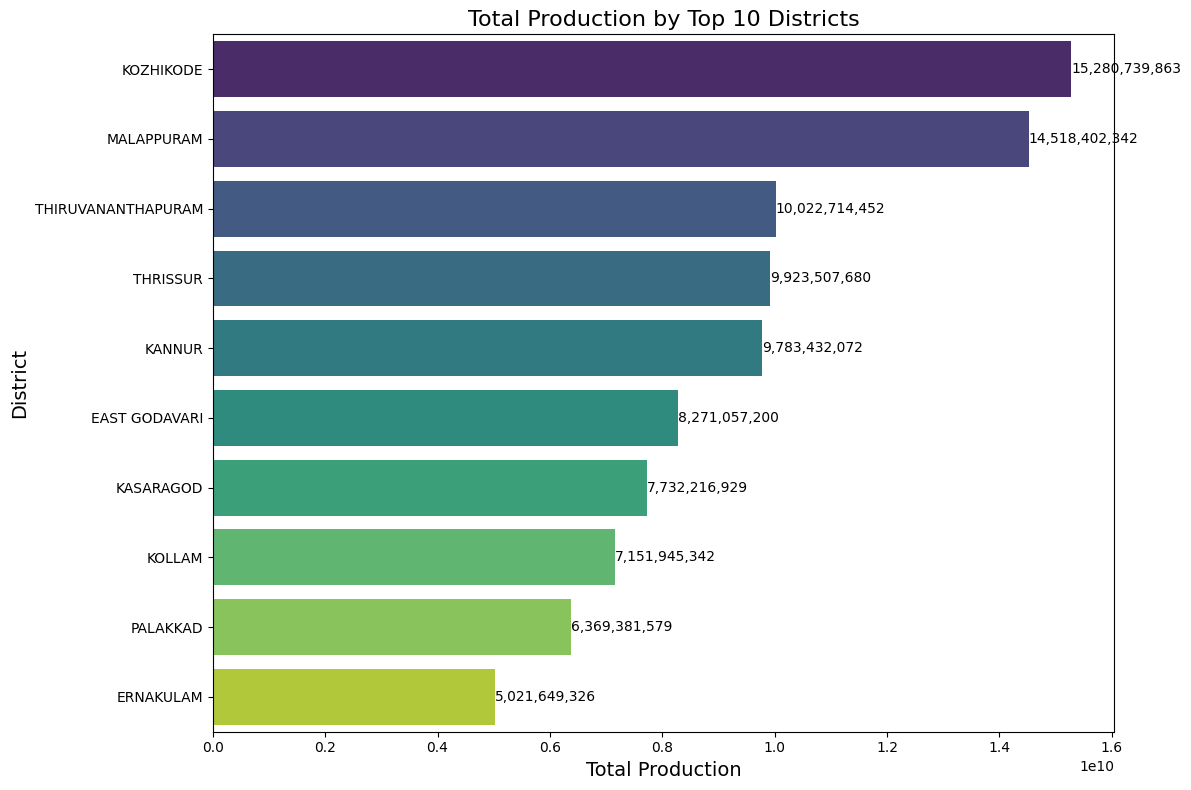

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("Crop Production data.csv")

# Group the data by District_Name and sum the Production
total_production_by_district = df.groupby('District_Name')['Production'].sum().reset_index()

# Sort the districts by total production in descending order and select the top 10
top_districts = total_production_by_district.sort_values(by='Production', ascending=False).head(10)

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(y='District_Name', x='Production', data=top_districts, palette='viridis')

plt.title('Total Production by Top 10 Districts', fontsize=16)
plt.xlabel('Total Production', fontsize=14)
plt.ylabel('District', fontsize=14)

# Add data labels to bars
for index, value in enumerate(top_districts['Production']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()



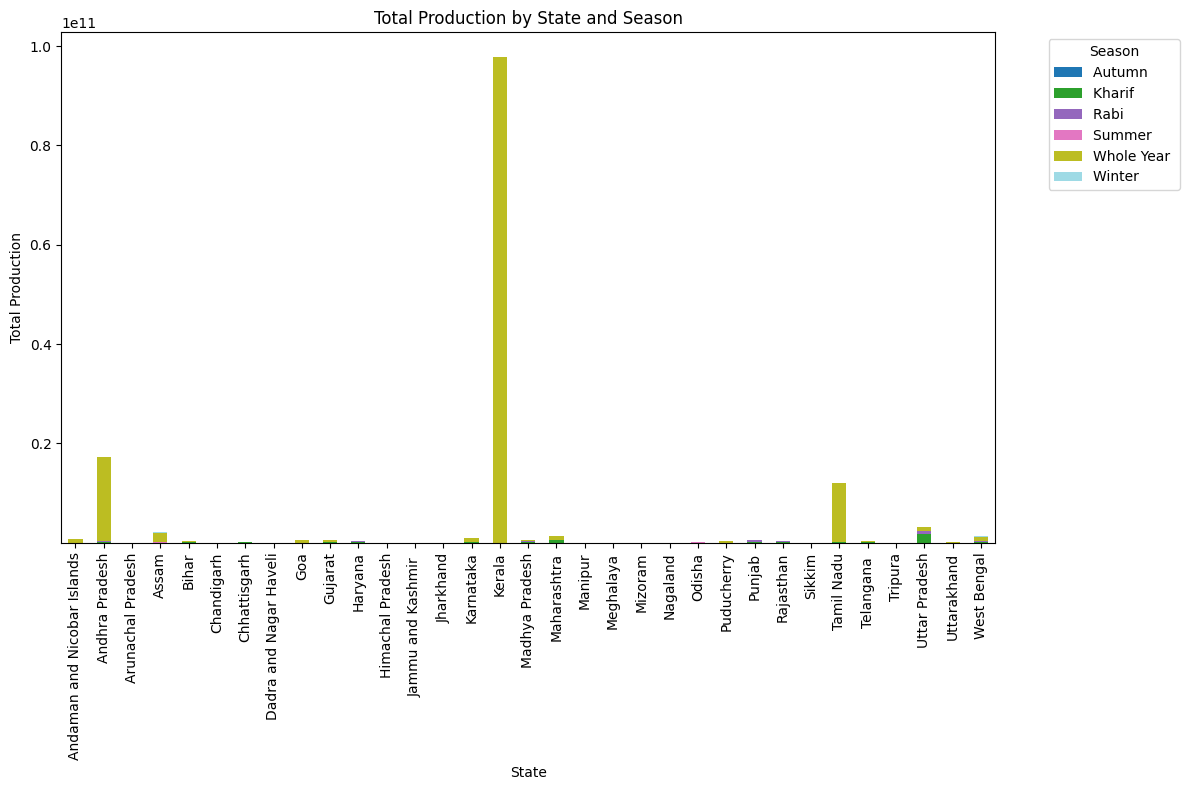

In [246]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("Crop Production data.csv")

# Group the data by State_Name and Season, summing the Production
production_by_state_season = df.groupby(['State_Name', 'Season'])['Production'].sum().unstack().fillna(0)

# Plot the stacked bar chart
production_by_state_season.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.xticks(rotation=90)
plt.title('Total Production by State and Season')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#State_Name	District_Name	Crop_Year	Season	Crop	Area	Production


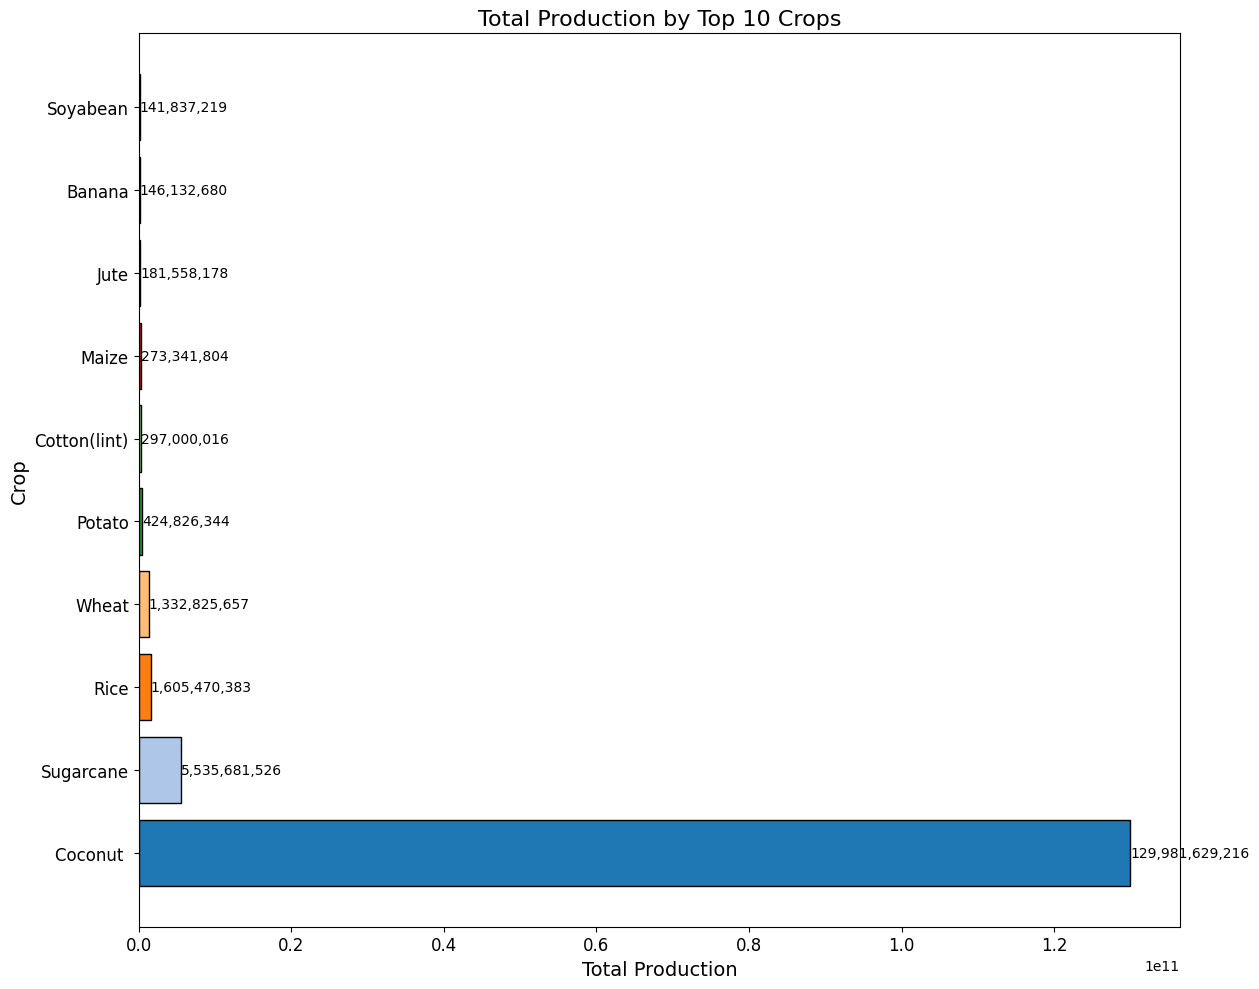

In [247]:
plt.figure(figsize=(12, 10))
bars = plt.barh(top_crops['Crop'], top_crops['Production'], color=plt.cm.tab20.colors[:len(top_crops)], edgecolor='black')
plt.title('Total Production by Top 10 Crops', fontsize=16)
plt.xlabel('Total Production', fontsize=14)
plt.ylabel('Crop', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', va='center', fontsize=10)

plt.show()


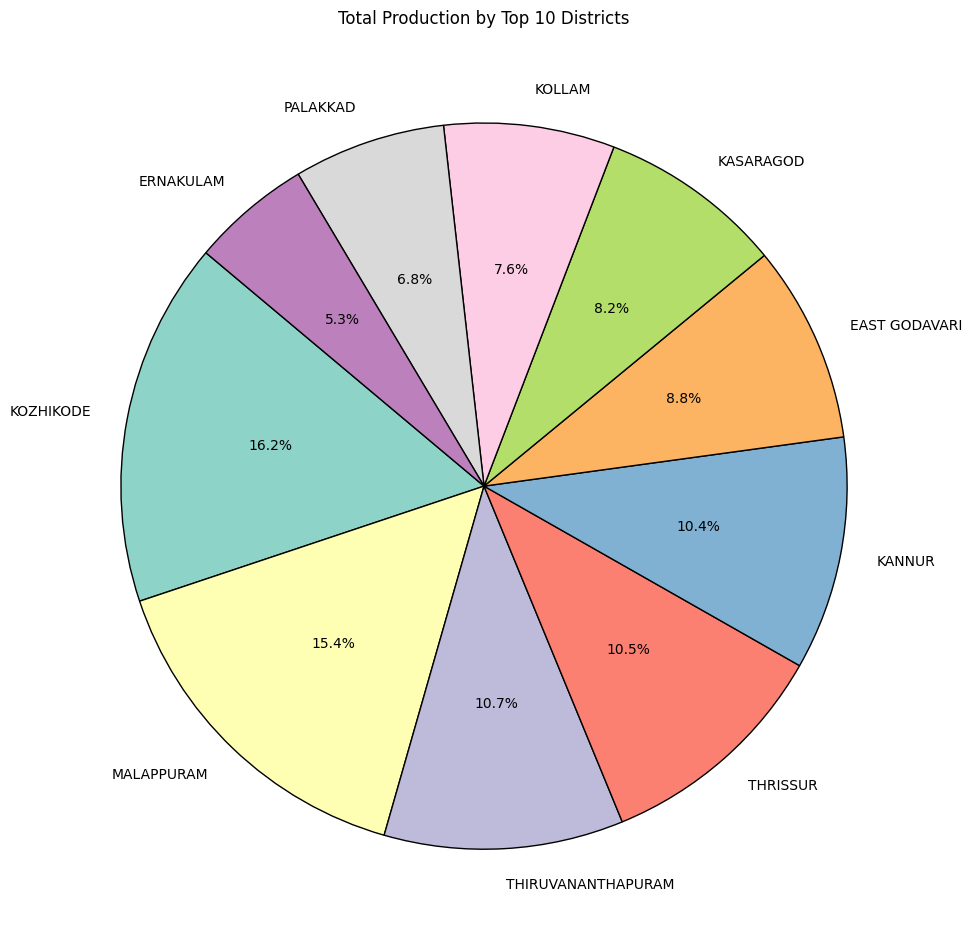

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("Crop Production data.csv")

# Group the data by District_Name and sum the Production
total_production_by_district = df.groupby('District_Name')['Production'].sum().reset_index()

# Sort the districts by total production in descending order and select the top 10
top_districts = total_production_by_district.sort_values(by='Production', ascending=False).head(10)

# Define Set3 colors for the pie chart
colors = plt.cm.Set3(range(len(top_districts)))  # Using Set3 colormap for pastel colors

# Plot the pie chart for the top 10 districts
plt.figure(figsize=(10, 10))
plt.pie(top_districts['Production'], labels=top_districts['District_Name'], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Total Production by Top 10 Districts')
plt.tight_layout()
plt.show()


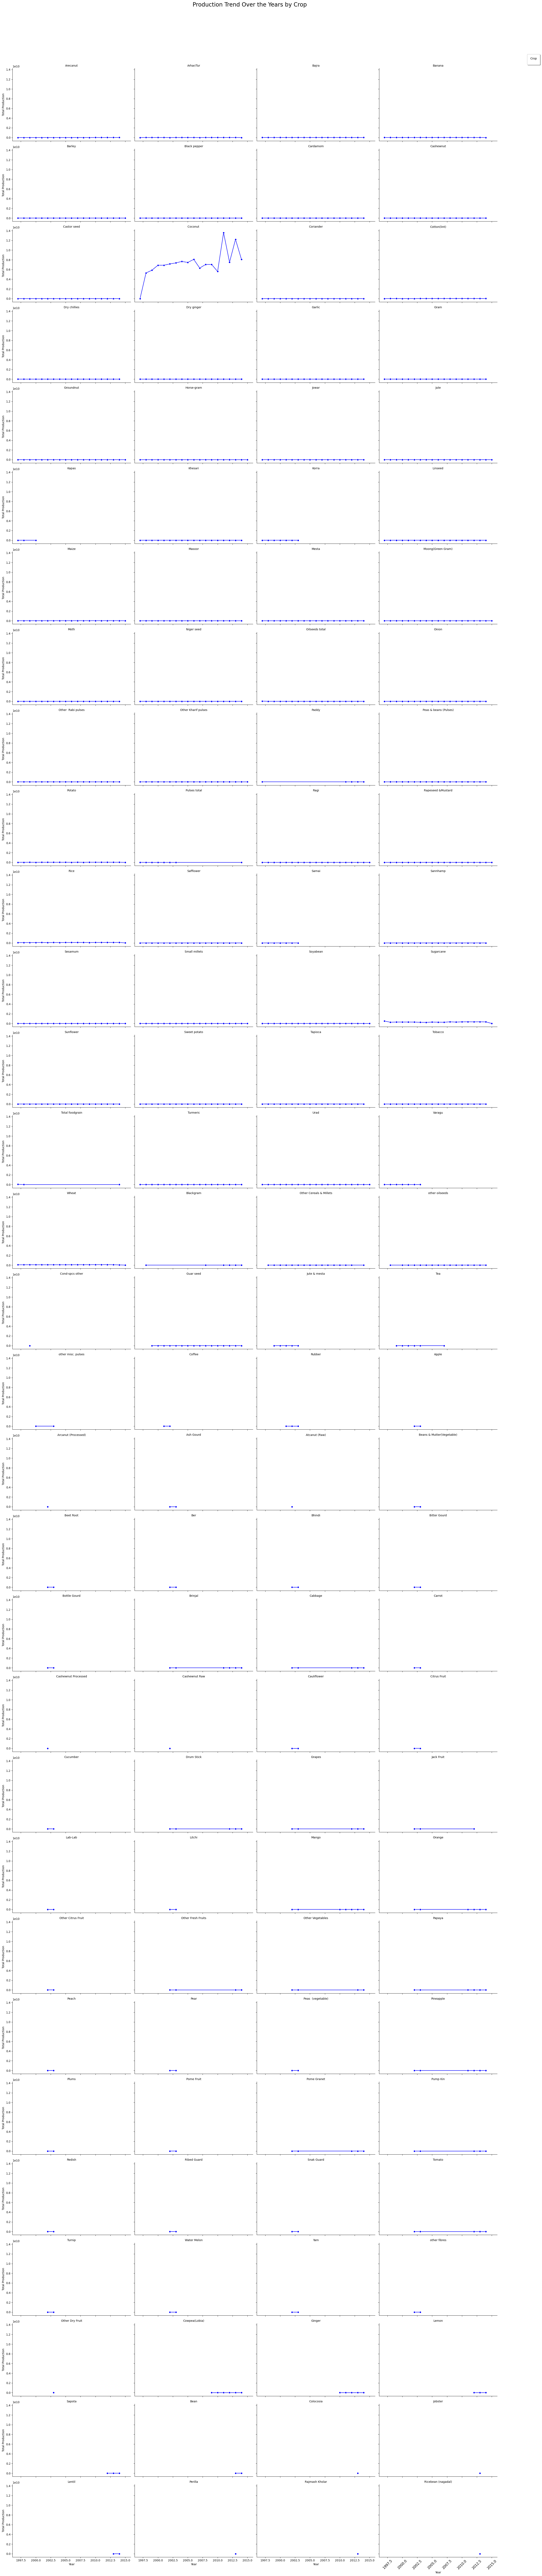

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("Crop Production data.csv")

# Group the data by Crop_Year and Crop, summing the Production
production_trend = df.groupby(['Crop_Year', 'Crop'])['Production'].sum().reset_index()

# Create a FacetGrid with line plots for each crop
g = sns.FacetGrid(production_trend, col="Crop", col_wrap=4, sharex=True, sharey=True, height=4, aspect=1.5, col_order=production_trend['Crop'].unique())
g.map_dataframe(sns.lineplot, x='Crop_Year', y='Production', marker='o', color='blue')
g.set_titles("{col_name}")
g.set_axis_labels('Year', 'Total Production')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title='Crop', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, shadow=True, borderpad=1)

plt.suptitle('Production Trend Over the Years by Crop', fontsize=20, y=1.02)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
